## Deflating Balloon

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def display_image(image, title="image", subplot=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if subplot:
        plt.subplot(subplot)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [57]:
vid = cv2.VideoCapture('videos/balloon.mp4')

In [58]:
def preprocess(img):
    
    b,g,r = cv2.split(img.astype(float))

    c1 = 1.5
    c2 = -2
    c3 = -0.1

    isolated = c1*g + c2*b + c3*r
    isolated = np.clip(isolated, 0, 255)
    isolated = isolated.astype(img.dtype)

    return isolated

In [59]:
frames = 0

areas = []
perimeters = []

Frame 1: Contour Area = 150569.5 Contour Perimeter = 1477.7758158445358


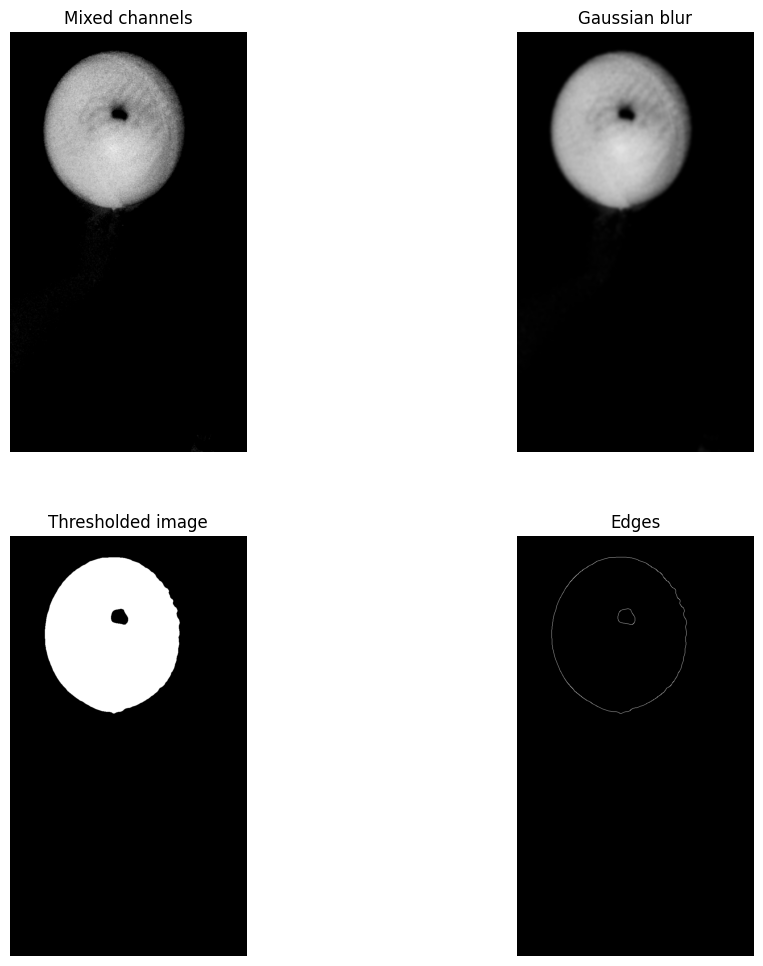

Frame 2: Contour Area = 150672.5 Contour Perimeter = 1479.0895241498947


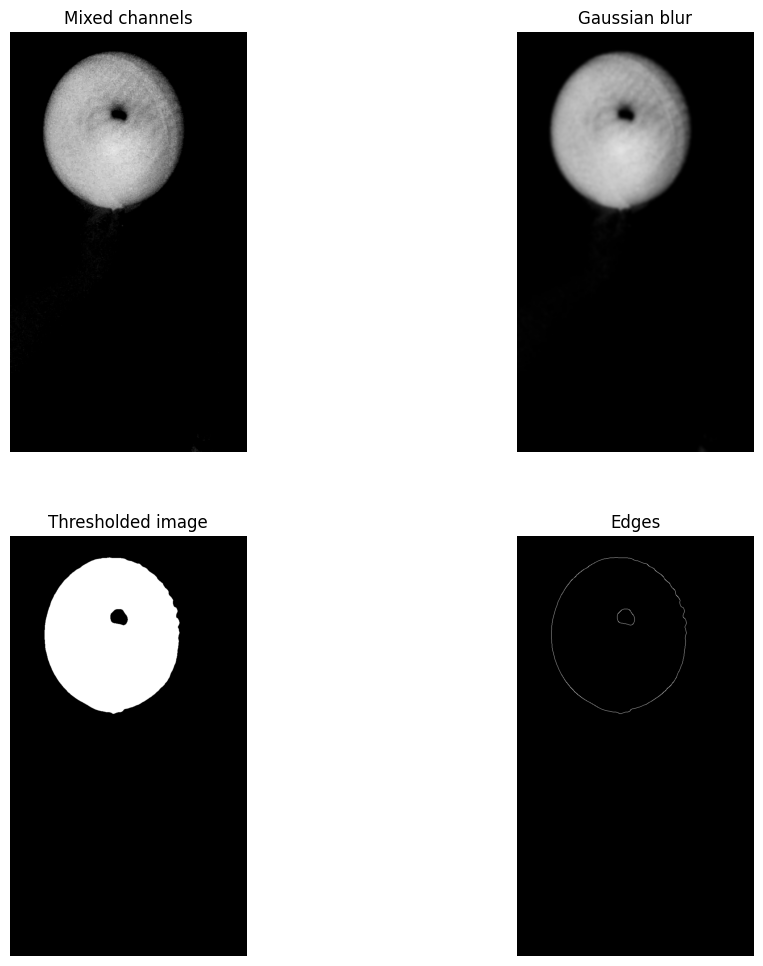

Frame 3: Contour Area = 150795.5 Contour Perimeter = 1480.261097073555


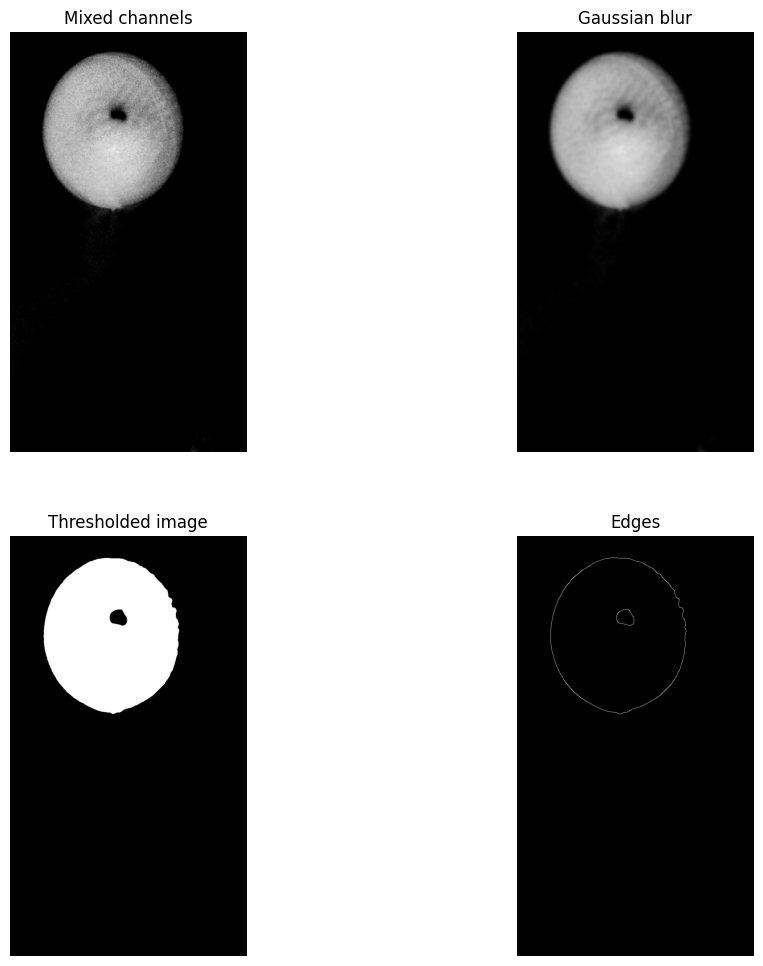

Frame 4: Contour Area = 152620.5 Contour Perimeter = 1480.462107539177


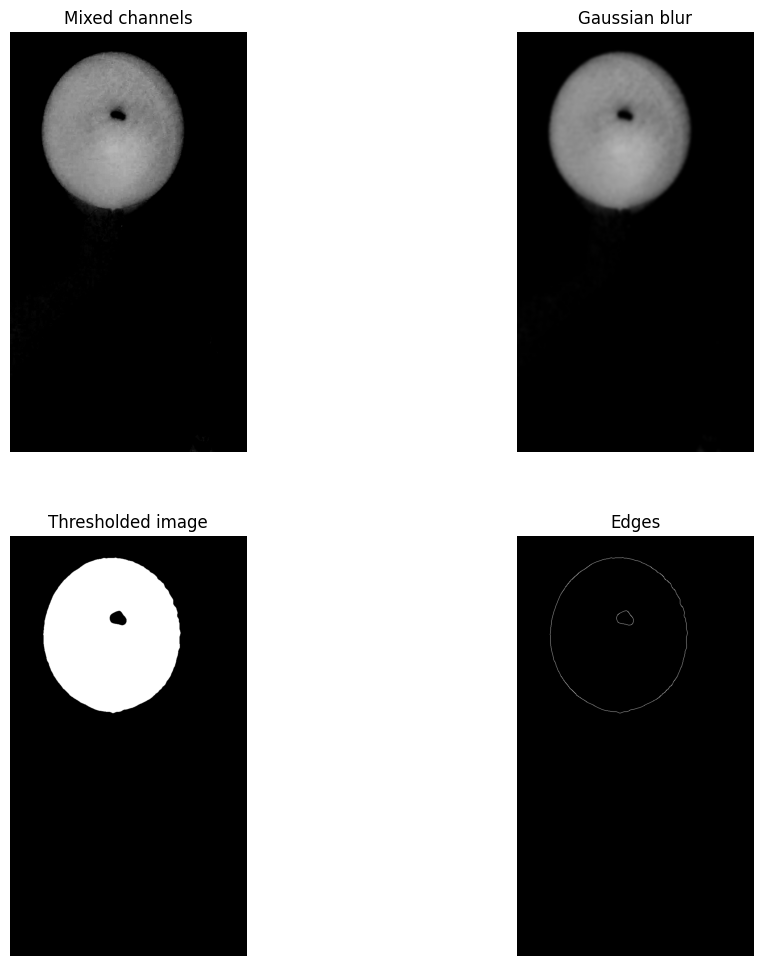

Frame 5: Contour Area = 152355.5 Contour Perimeter = 1479.2905346155167


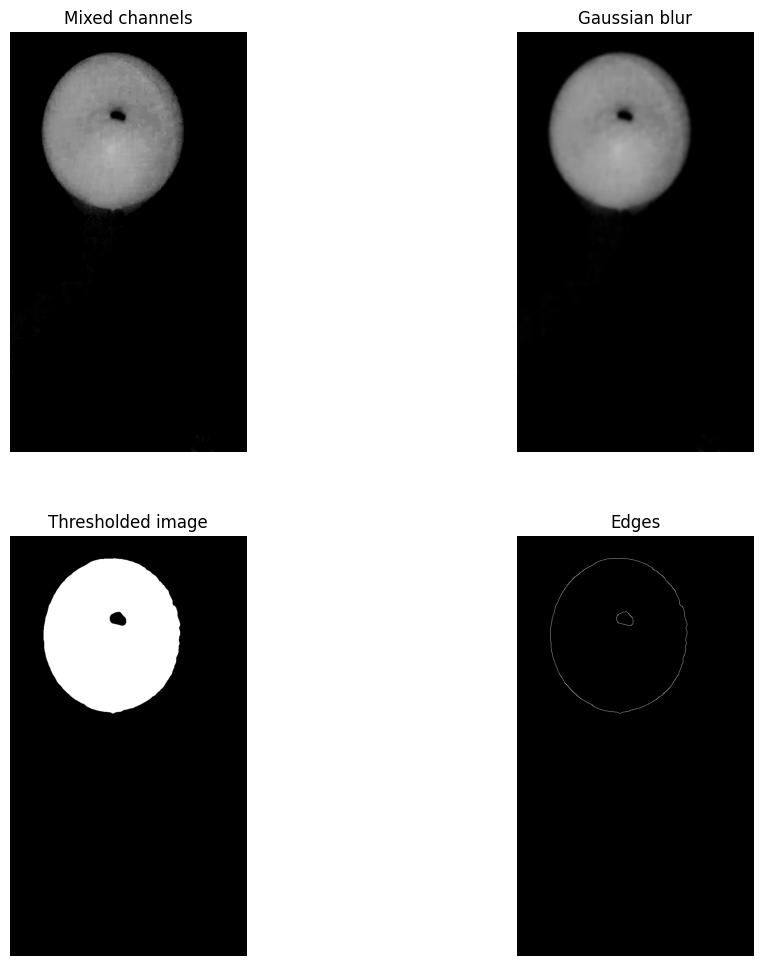

Frame 6: Contour Area = 151824.0 Contour Perimeter = 1475.5331752300262


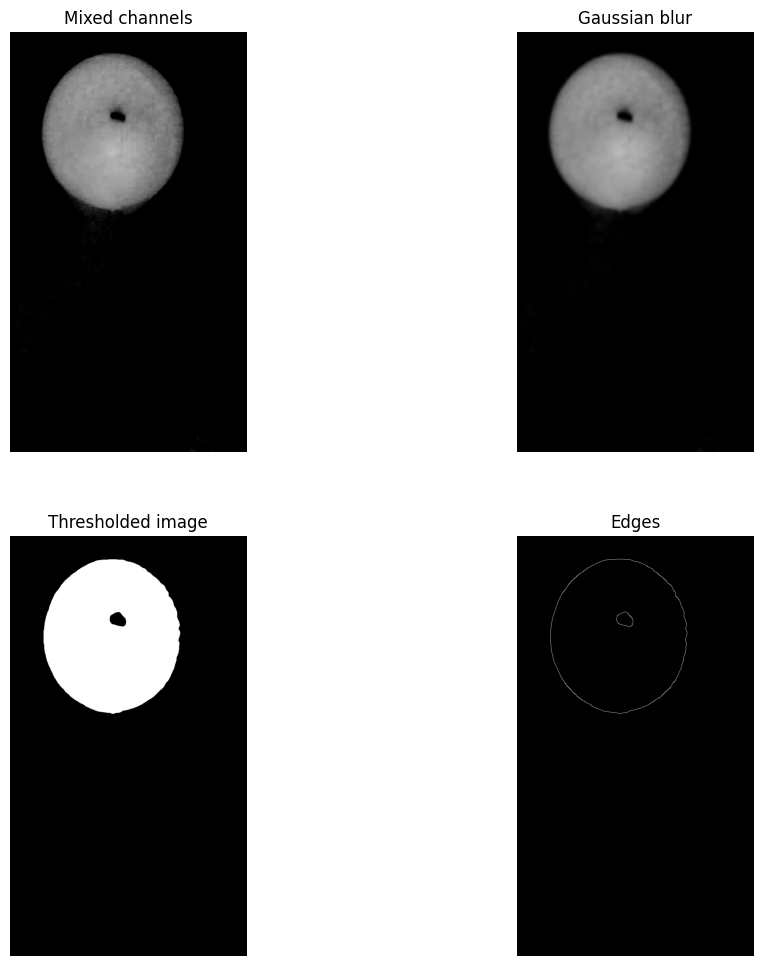

Frame 7: Contour Area = 151385.5 Contour Perimeter = 1480.261097073555


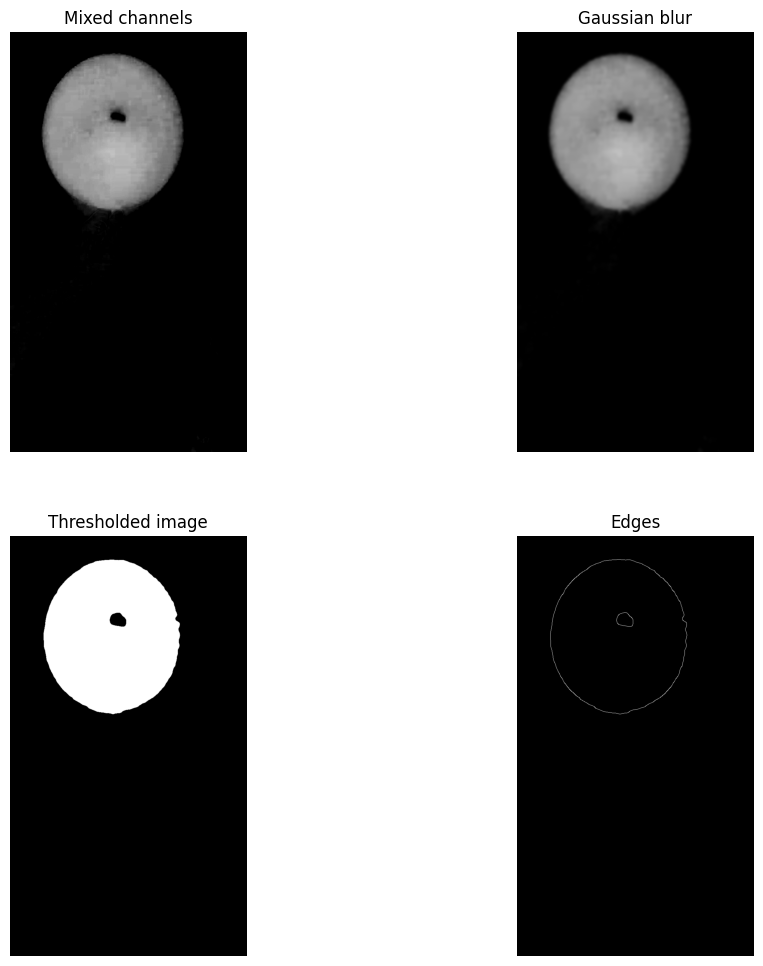

Frame 8: Contour Area = 151142.0 Contour Perimeter = 1474.361602306366


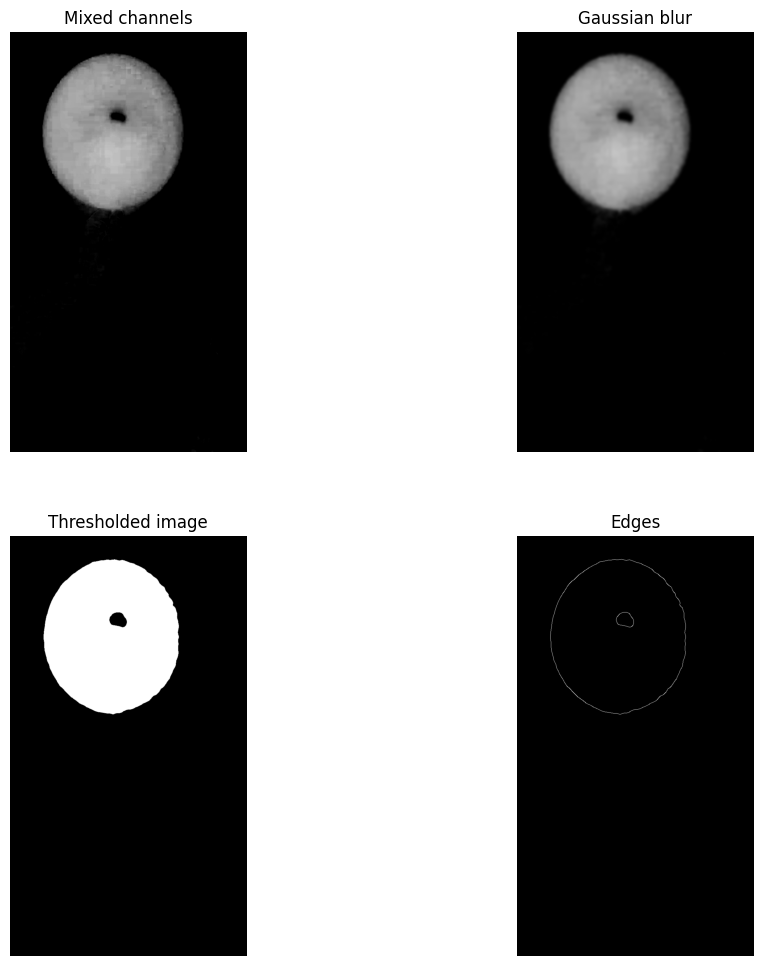

Frame 9: Contour Area = 151067.5 Contour Perimeter = 1476.947388768196


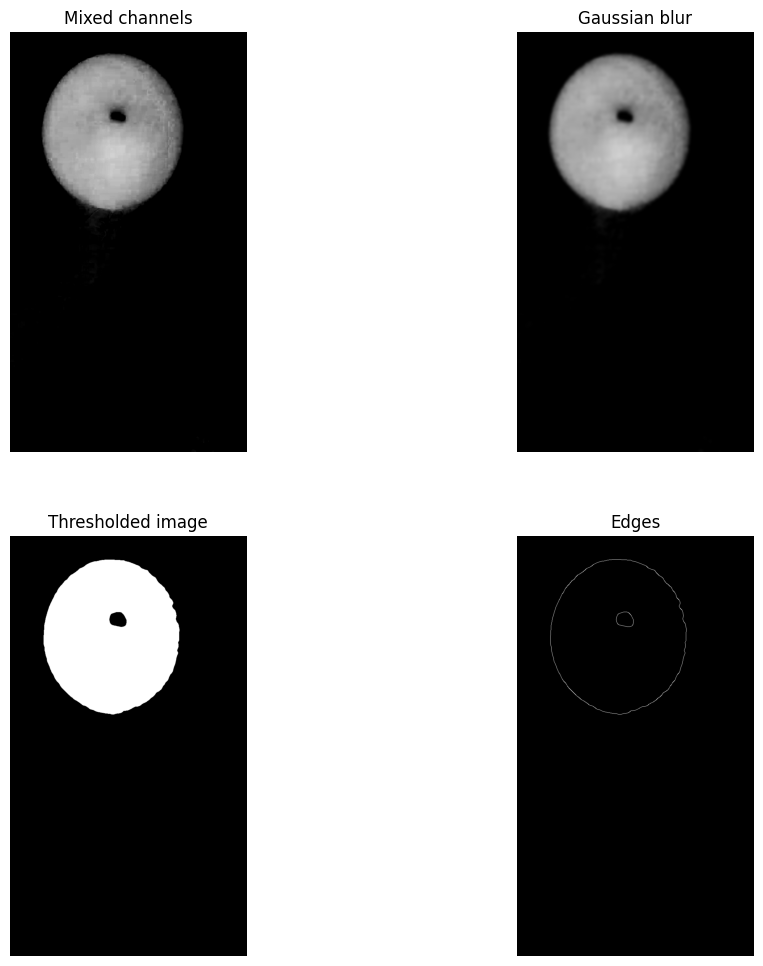

Frame 10: Contour Area = 150765.0 Contour Perimeter = 1478.0184564590454


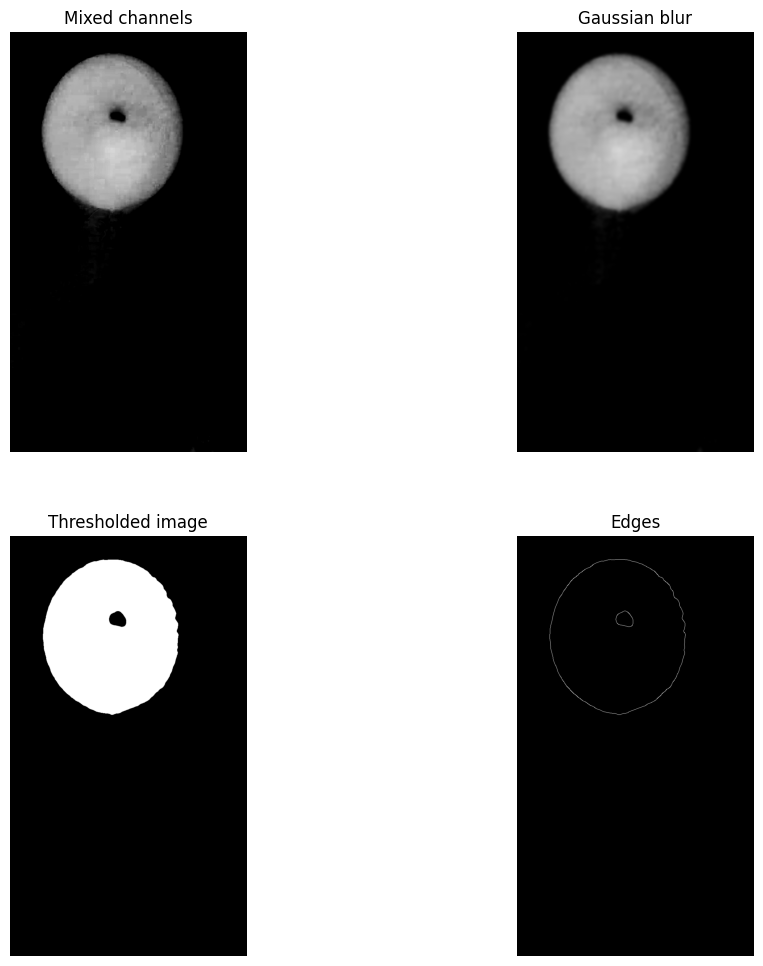

Frame 11: Contour Area = 150584.5 Contour Perimeter = 1472.6042429208755


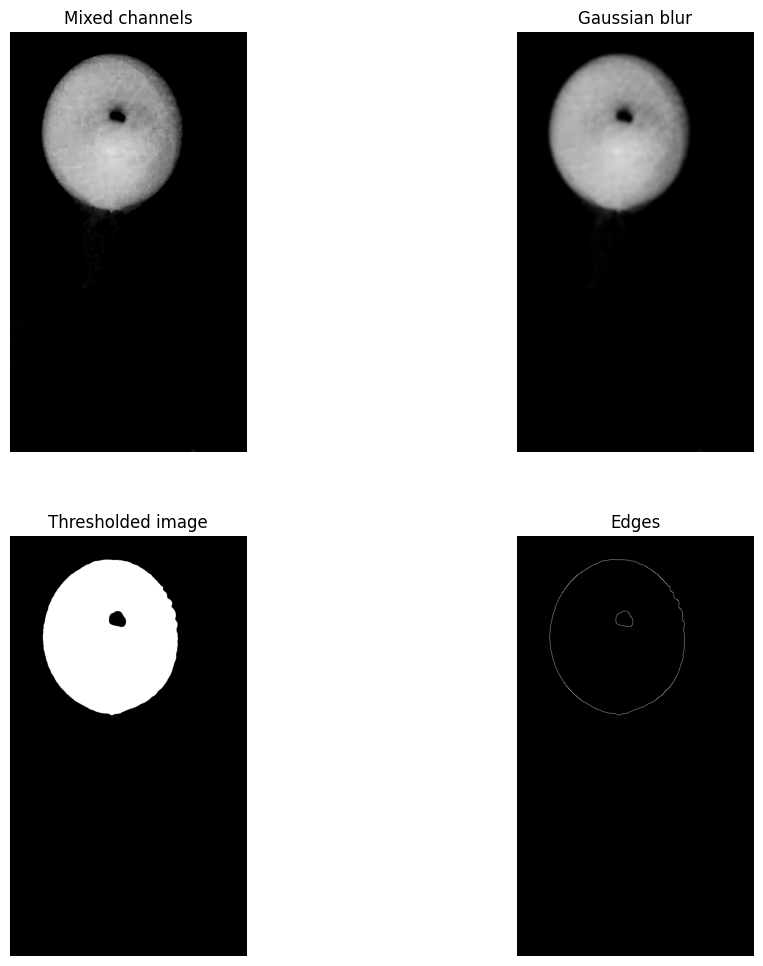

Frame 12: Contour Area = 150545.5 Contour Perimeter = 1475.0895241498947


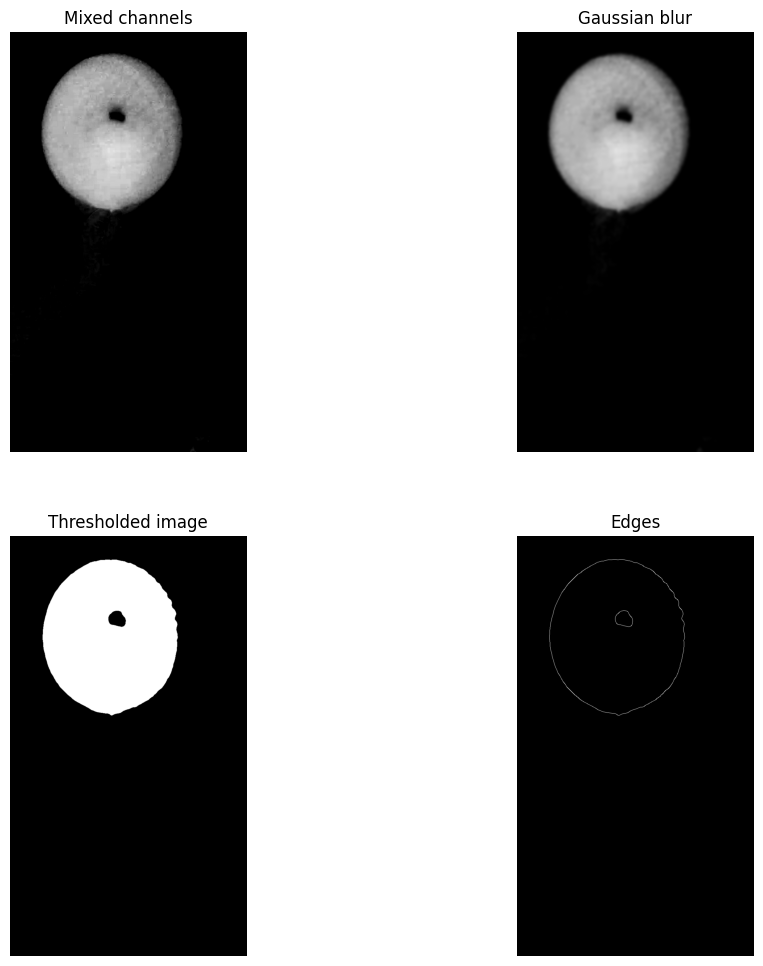

Frame 13: Contour Area = 150318.0 Contour Perimeter = 1482.361602306366


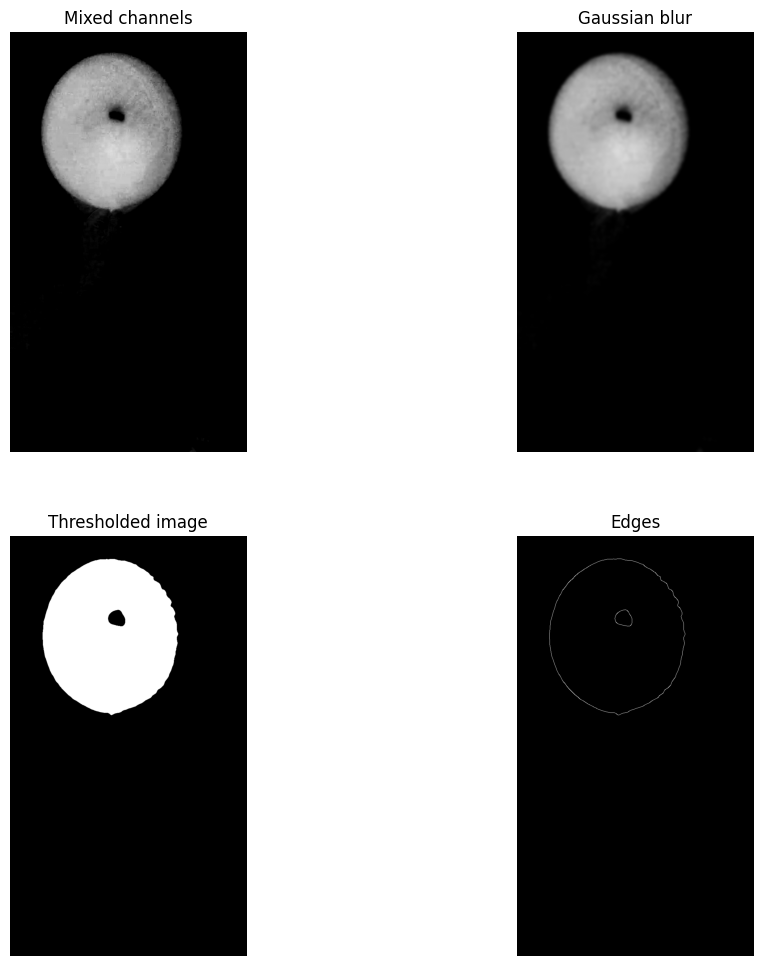

Frame 14: Contour Area = 150141.5 Contour Perimeter = 1477.2905346155167


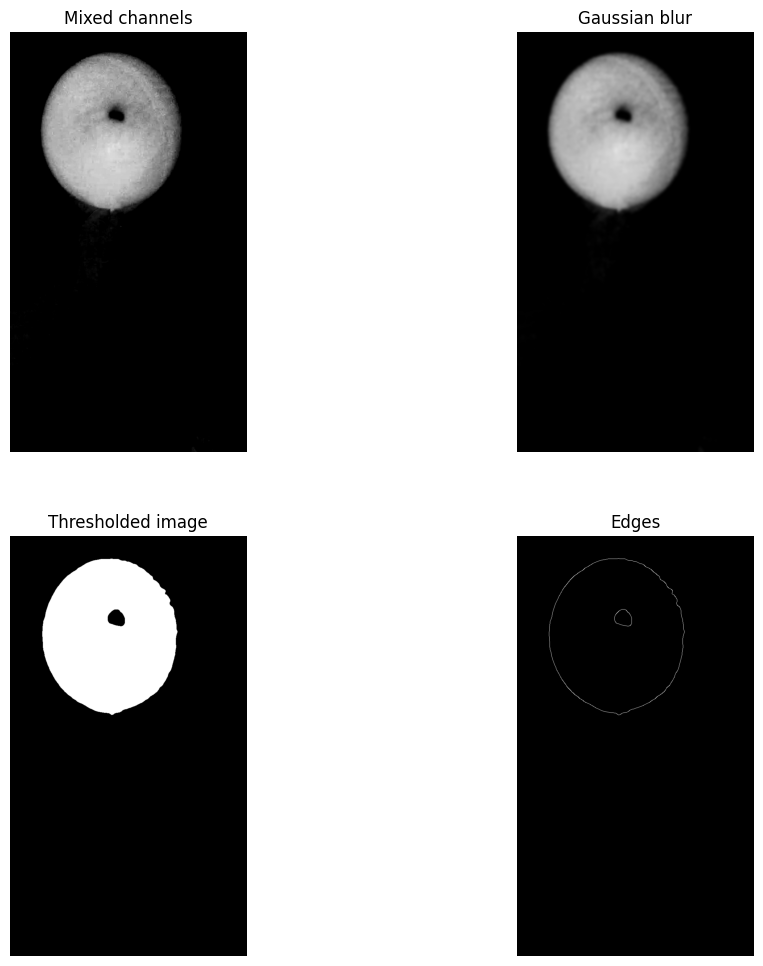

Frame 15: Contour Area = 150533.0 Contour Perimeter = 1486.9890189170837


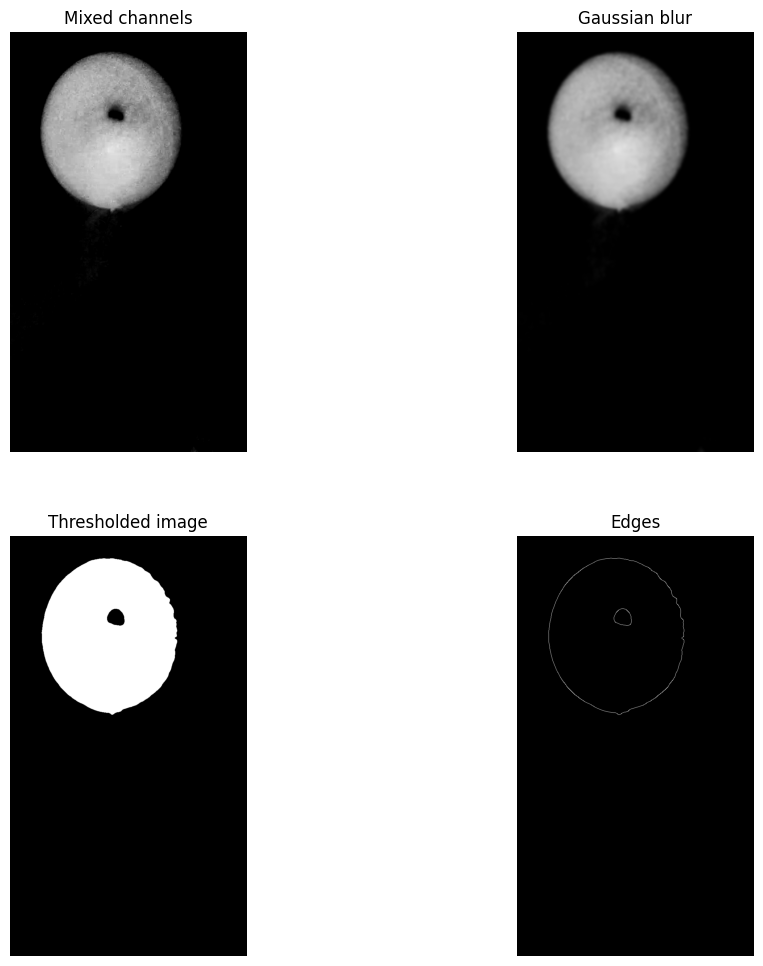

Frame 16: Contour Area = 149862.5 Contour Perimeter = 1480.1189616918564


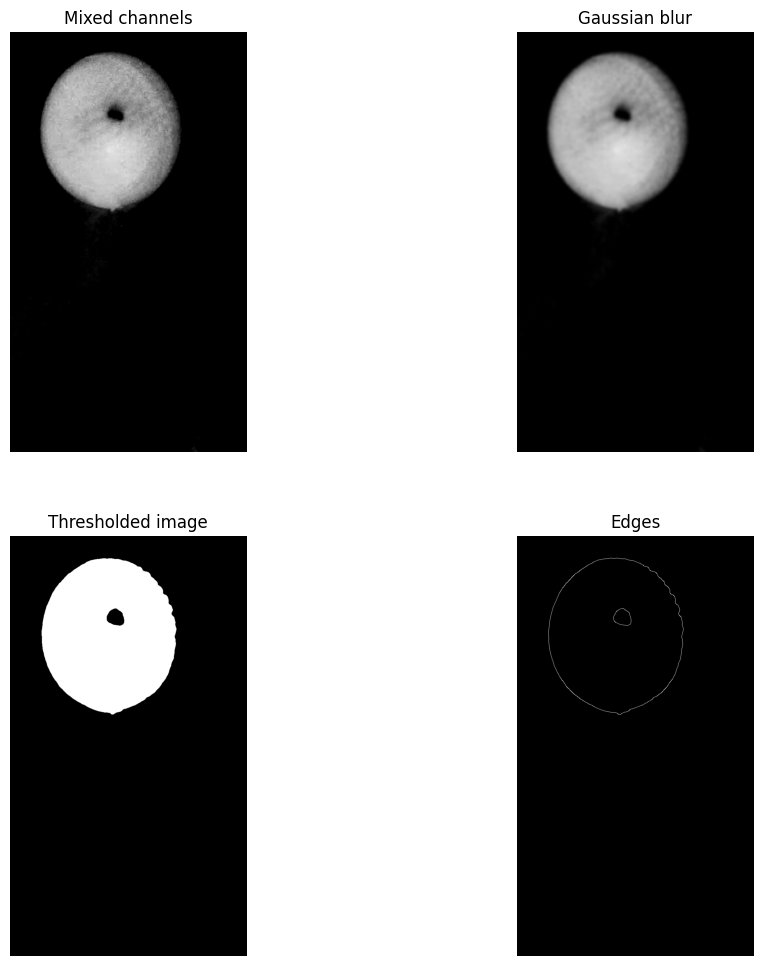

Frame 17: Contour Area = 149928.0 Contour Perimeter = 1475.047894001007


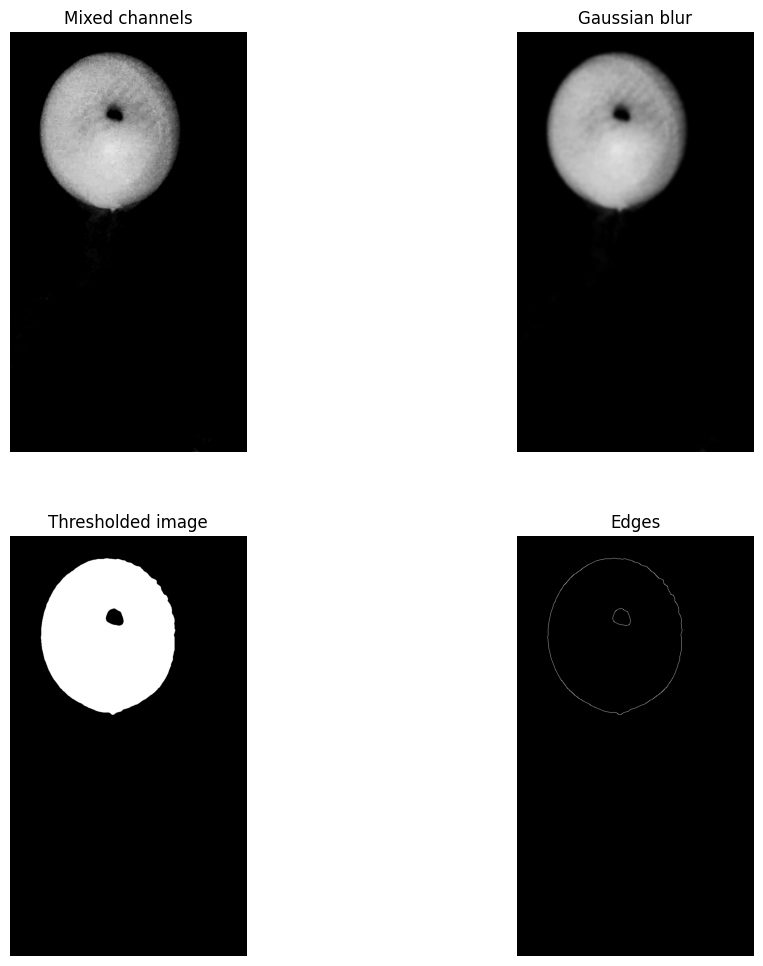

Frame 18: Contour Area = 149798.0 Contour Perimeter = 1472.8468835353851


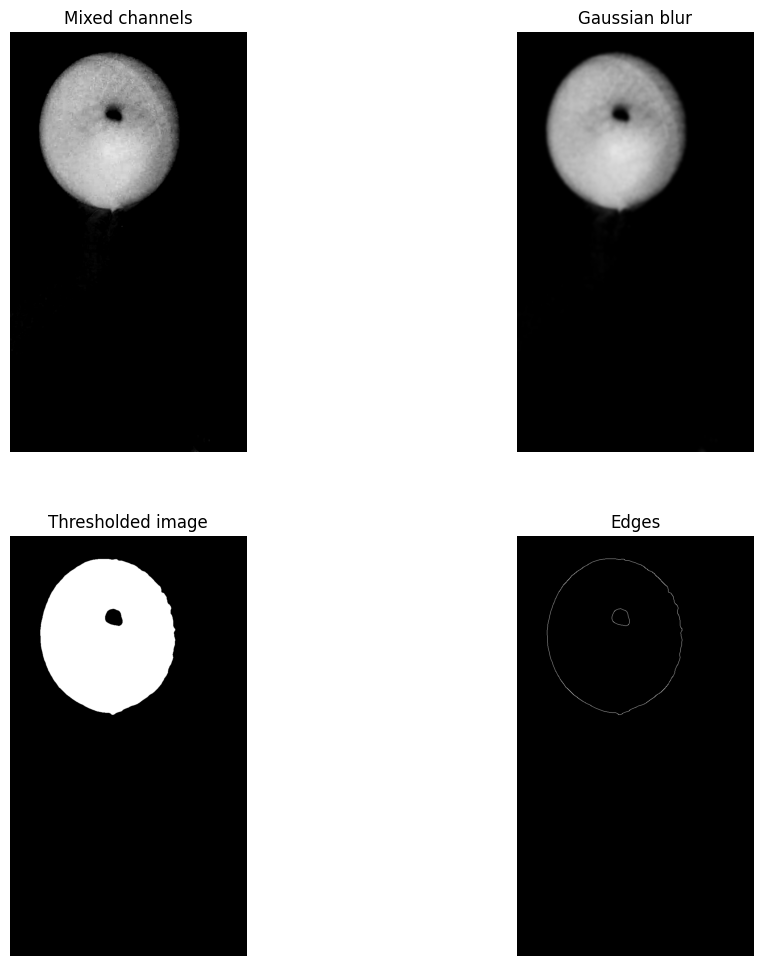

Frame 19: Contour Area = 149177.5 Contour Perimeter = 1479.0895241498947


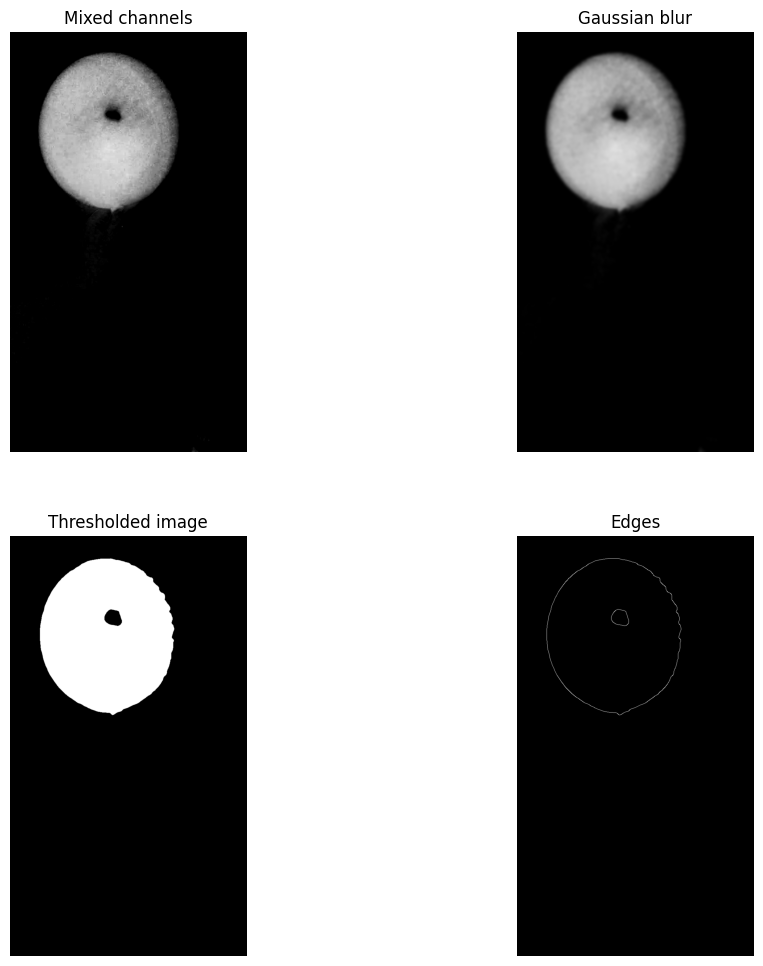

Frame 20: Contour Area = 149034.0 Contour Perimeter = 1482.0184564590454


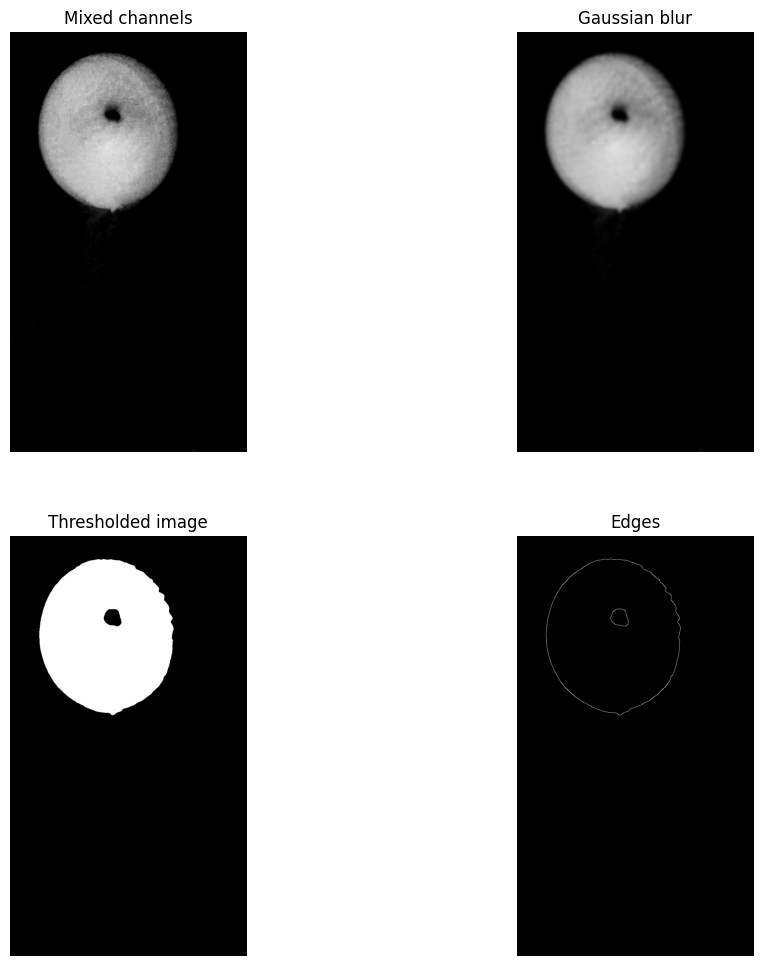

In [60]:
while True:

    ret, img = vid.read()

    if not ret or frames>=20:
        break

    isolated = preprocess(img)

    imgBlur = cv2.GaussianBlur(isolated, (21,21), 0)

    ret, imgth = cv2.threshold(imgBlur, 80, 255, cv2.THRESH_BINARY)

    edge = cv2.Canny(imgth, 100, 150)

    contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if contours:

        selected_contour = contours[0].copy()

        for contour in contours:
            if cv2.contourArea(contour) > 2000:
                selected_contour = contour

        ca = cv2.contourArea(selected_contour)
        cl = cv2.arcLength(selected_contour, True)

        print(f"Frame {frames+1}: Contour Area = {ca} Contour Perimeter = {cl}")

        plt.figure(figsize=(12,12))

        display_image(isolated, "Mixed channels", subplot=221)
        display_image(imgBlur, "Gaussian blur", subplot=222)
        display_image(imgth, "Thresholded image", subplot=223)
        display_image(edge, "Edges", subplot=224)
        plt.show()
        
        areas.append(ca)
        perimeters.append(cl)
    
    frames+=1

vid.release()

247.9

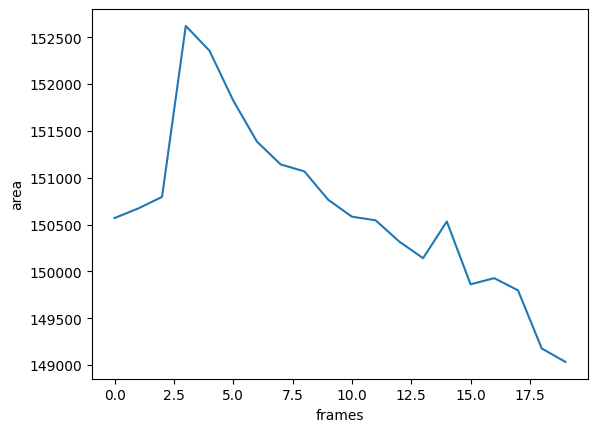

In [70]:
plt.plot(areas)
plt.xlabel("frames")
plt.ylabel("area")
(areas[3] - areas[13])/10

0.31715729236602785

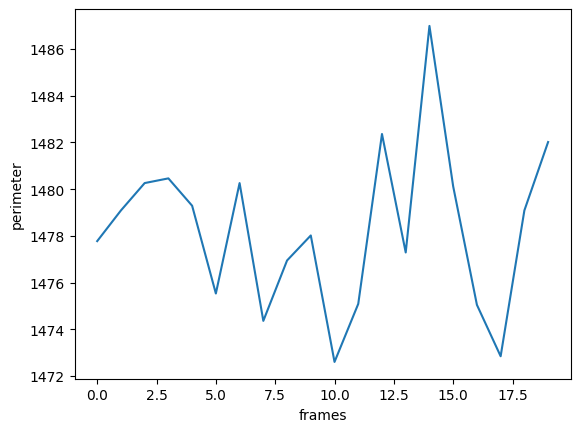

In [71]:
plt.plot(perimeters)
plt.xlabel("frames")
plt.ylabel("perimeter")
(perimeters[3] - perimeters[13])/10

## Viscous Fingering

In [78]:
vid = cv2.VideoCapture("videos/visc.MOV")

In [ ]:
while True:

    ret, img = vid.read()

    if not ret:
        break
        
    b, g, r = cv2.split(img.astype(float))

    c1 = -2.12
    c2 = 0.245
    c3 = 1.359

    isolated = c1*g + c2*b + c3*r
    isolated = np.clip(isolated, 0, 255)

    isolated = isolated.astype(img.dtype)
    # display_image(isolated, "mixed channel : before blurring")

    imgblur = cv2.GaussianBlur(isolated, (21,21), 0)
    # display_image(imgblur, "blurred image")

    ret, imgth = cv2.threshold(imgblur, 80, 255, cv2.THRESH_BINARY)

    edge = cv2.Canny(imgth, 100, 150)
    display_image(edge, "edges")

vid.release()